<a href="https://colab.research.google.com/github/Muhemta/Project-ML1/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read
import cv2 as cv

img = cv.imread('../Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0)

# Reading Videos
capture = cv.VideoCapture('../Resources/Videos/dog.mp4')

while True:
    isTrue, frame = capture.read()

    # if cv.waitKey(20) & 0xFF==ord('d'):
    # This is the preferred way - if `isTrue` is false (the frame could
    # not be read, or we're at the end of the video), we immediately
    # break from the loop.
    if isTrue:
        cv.imshow('Video', frame)
        if cv.waitKey(20) & 0xFF==ord('d'):
            break
    else:
        break

capture.release()
cv.destroyAllWindows()

In [ ]:
#draw
import cv2 as cv
import numpy as np

blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

# 1. Paint the image a certain colour
blank[200:300, 300:400] = 0,0,255
cv.imshow('Green', blank)

# 2. Draw a Rectangle
cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
cv.imshow('Rectangle', blank)

# 3. Draw A circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv.imshow('Circle', blank)

# 4. Draw a line
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv.imshow('Line', blank)

# 5. Write text
cv.putText(blank, 'Hello, my name is Jason!!!', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv.imshow('Text', blank)

cv.waitKey(0)

In [ ]:
#basic functions
import cv2 as cv

# Read in an image
img = cv.imread('../Resources/Photos/park.jpg')
cv.imshow('Park', img)

# Converting to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
cv.imshow('Gray', gray)

# Blur
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT) #bulanıklaştırma,(7,7)=kernel size
cv.imshow('Blur', blur)

# Edge Cascade
canny = cv.Canny(blur, 125, 175) #resmin köşelerini çıkartmaya yarıyor
cv.imshow('Canny Edges', canny)

# Dilating the image(canny uyguladıktan sonra edgelerin keskinliğini arttırma)
dilated = cv.dilate(canny, (7,7), iterations=3)
cv.imshow('Dilated', dilated)

# Eroding
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow('Eroded', eroded)

# Resize
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

# Cropping(fotonun sadece belirtilen kısımlarını gösterir)
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)

In [ ]:
#transformation
import cv2 as cv
import numpy as np

img = cv.imread('../Resources/Photos/park.jpg')
cv.imshow('Park', img)

# Translation
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0]) #(width,height)
    return cv.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

translated = translate(img, -100, 100) #100 pixel sola ve aşağı kaymış hali
cv.imshow('Translated', translated)

# Rotation
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)

    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45) #saat yönünde 45 derece
cv.imshow('Rotated', rotated)

rotated_rotated = rotate(img, -90)
cv.imshow('Rotated Rotated', rotated_rotated)

# Resizing (500,500)=destination,interpolation=bir pikselin değerini, çevresindeki mevcut piksellerin değerlerini kullanarak tahmin etme
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

# Flipping 0-vertical,1-horizontal,-1-both
flip = cv.flip(img, -1)
cv.imshow('Flip', flip)

# Cropping
cropped = img[200:400, 300:400]
cv.imshow('Cropped', cropped)


cv.waitKey(0)

In [ ]:
#contours
import cv2 as cv
import numpy as np

img = cv.imread('../Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape, dtype='uint8')
cv.imshow('Blank', blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)

#kenar tespiti,not:kontür bulma gray scale olmalı
canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny Edges', canny)

#Threshold(eşikleme)-->(hedef,eşik değeri,eşik değeri geçen tüm piksellere atanacak değer,eşikleme tipi)
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv.imshow('Thresh', thresh)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)#(hedef,konturları listele,kontürdeki ara noktaları kaldır)
print(f'{len(contours)} contour(s) found!')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv.imshow('Contours Drawn', blank)

cv.waitKey(0)

In [ ]:
#color spaces
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../Resources/Photos/park.jpg')
cv.imshow('Park', img)

#OpenCV (cv2.imshow) BGR Kullanır: OpenCV görüntüleri bellekte (B,G,R) sırasıyla tutar. Eğer bir görüntüyü cv2.imread() ile okuyup direkt cv2.imshow() ile gösterirsen, renkler doğru görünür.
#Matplotlib (plt.imshow) RGB Kullanır: Görselleştirme standartları gereği Matplotlib, (R,G,B) sırasını bekler.
# plt.imshow(img)
# plt.show()

# BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# BGR to HSV(huge saturation value)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)

# BGR to L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

# HSV to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB --> BGR', lab_bgr)

cv.waitKey(0)

In [ ]:
#split and merge colours
import cv2 as cv
import numpy as np

img = cv.imread('../Resources/Photos/park.jpg')
cv.imshow('Park', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

b,g,r = cv.split(img)

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])


cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

merged = cv.merge([b,g,r])
cv.imshow('Merged Image', merged)

cv.waitKey(0)

In [ ]:
#blurring
import cv2 as cv

img = cv.imread('../Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

# Averaging
average = cv.blur(img, (3,3))
cv.imshow('Average Blur', average)

# Gaussian Blur
gauss = cv.GaussianBlur(img, (3,3), 0)
cv.imshow('Gaussian Blur', gauss)

# Median Blur
median = cv.medianBlur(img, 3)
cv.imshow('Median Blur', median)

# Bilateral
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)

In [ ]:
#bitwise operations
import cv2 as cv
import numpy as np

blank = np.zeros((400,400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

# bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow('Bitwise AND', bitwise_and)

# bitwise OR --> non-intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('Bitwise OR', bitwise_or)

# bitwise XOR --> non-intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('Bitwise XOR', bitwise_xor)

# bitwise NOT
bitwise_not = cv.bitwise_not(circle)
cv.imshow('Circle NOT', bitwise_not)

cv.waitKey(0)

In [ ]:
#masking
import cv2 as cv
import numpy as np

img = cv.imread('../Resources/Photos/cats 2.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_and(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

#önce dikdörgen veya çember oluşturdu sonra bitwise ile gerçek fotoğrafı maskeledi
masked = cv.bitwise_and(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)

cv.waitKey(0)

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('../Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('Mask', masked)

# GRayscale histogram
# gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256] )

# plt.figure()
# plt.title('Grayscale Histogram')
# plt.xlabel('Bins')
# plt.ylabel('# of pixels')
# plt.plot(gray_hist)
# plt.xlim([0,256])
# plt.show()

# Colour Histogram

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

cv.waitKey(0)

In [ ]:
#treshold
import cv2 as cv

img = cv.imread('../Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY )
cv.imshow('Simple Thresholded', thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV )
cv.imshow('Simple Thresholded Inverse', thresh_inv)

# Adaptive Thresholding(source,maxvalue,method,typetreshold,blocksize,sabit)
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
cv.imshow('Adaptive Thresholding', adaptive_thresh)

cv.waitKey(0)

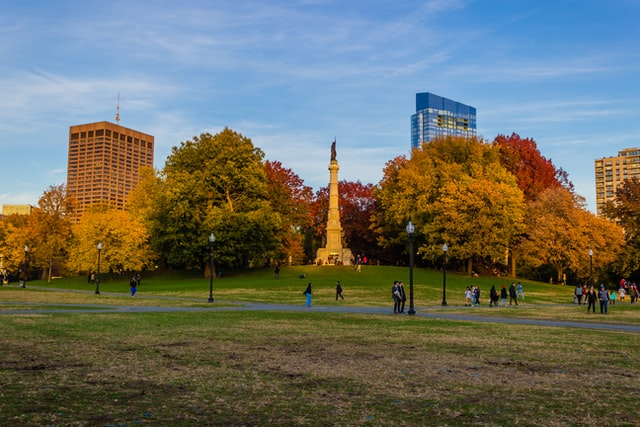

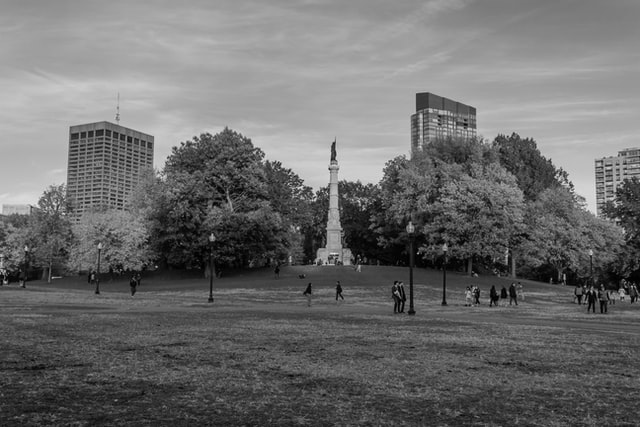

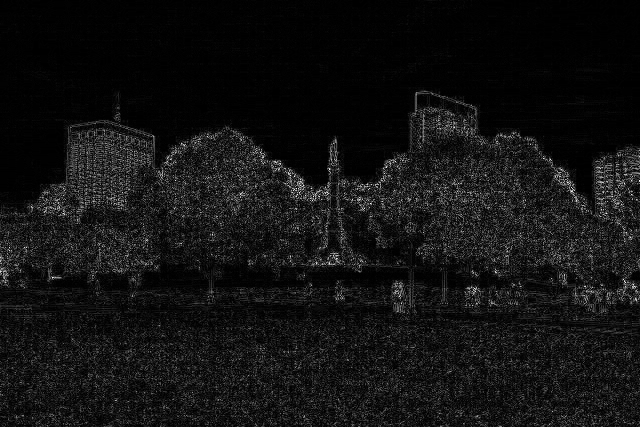

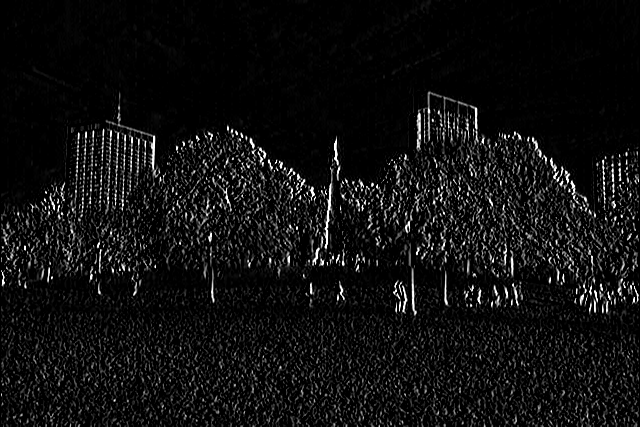

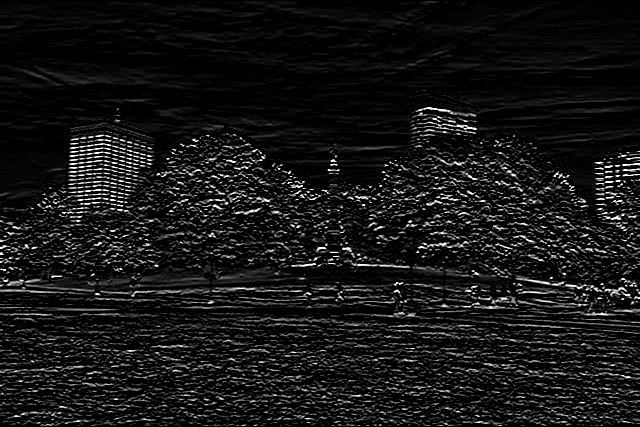

/usr/local/lib/python3.12/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


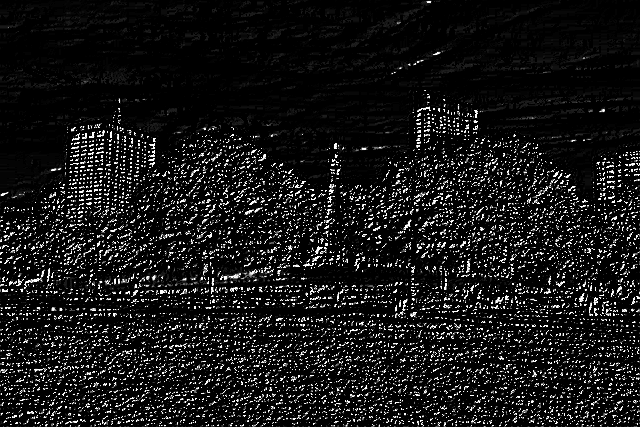

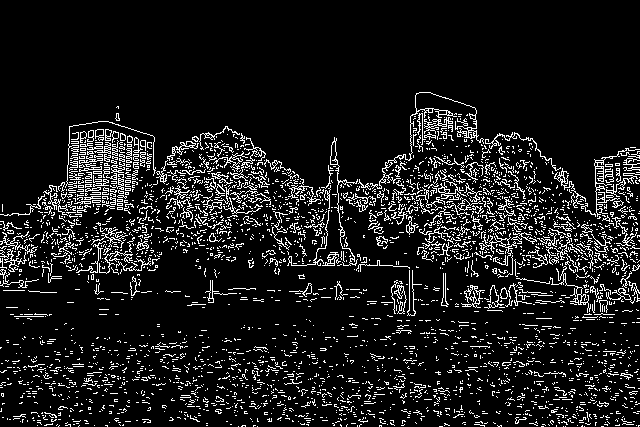

-1

In [ ]:
#edge detection
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('/content/park.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

# Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv2_imshow(canny)
cv.waitKey(0)

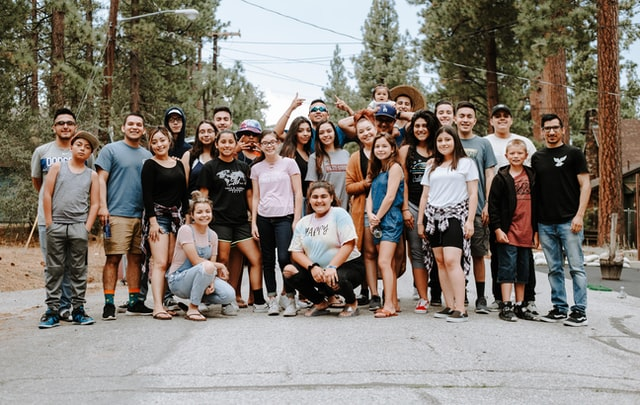

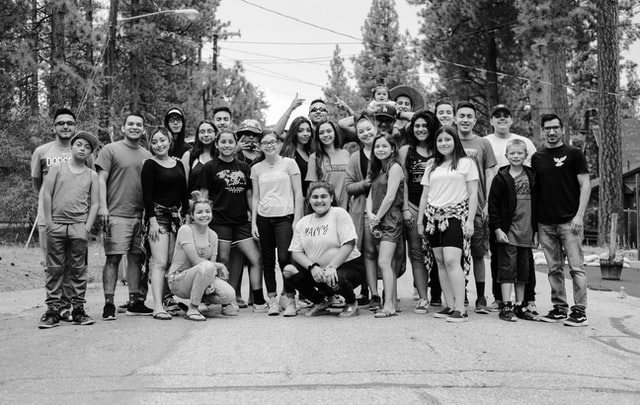

error: OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [ ]:
#face detection with Haar Cascades
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/group 1.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)
#haar_face.xml dosyası, yüzlerin ortak özelliklerini (gözler, burun köprüsü vb.) kodlayan binlerce Haar Özelliği içeren bir XML dosyasıdır.
#cv.CascadeClassifier	Önceden eğitilmiş sınıflandırıcıyı belleğe yükler.
haar_cascade = cv.CascadeClassifier('haar_face.xml')

#Bu fonksiyon, gri tonlamalı görüntüde farklı boyutlardaki (multi-scale) yüzleri aramaya başlar ve bulunan yüzlerin koordinatlarını (x, y, genişlik, yükseklik) bir liste olarak döndürür.
faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f'Number of faces found = {len(faces_rect)}')

#(x, y): Dikdörtgenin sol üst köşesi, (w, h): Genişlik ve Yükseklik.
for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv2_imshow(img)



cv.waitKey(0)

In [6]:
# Colab Hücresi 1

# Kurulu olabilecek tüm OpenCV sürümlerini kaldır
!pip uninstall opencv-python opencv-contrib-python -y

# Temel OpenCV paketini (CascadeClassifier dahil) yeniden yükle
!pip install opencv-python

Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 9.7 MB/s eta 0:00:00


In [9]:
#Face Recognition with OpenCV's built-in recognizer
import os
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # Colab'de görüntülemek için
from google.colab import drive # Drive'a kaydetmek için (Opsiyonel)

# Colab Hücresi 2: XML Dosyasını İndir
# En yaygın kullanılan yüz tanıma XML dosyasını doğrudan çalışma dizinine çekelim.
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -O haar_face.xml
!git clone https://github.com/jasmcaus/opencv-course.git

DIR = '/content/opencv-course/Resources/Faces/train'
UZANTILAR = ('.jpg', '.jpeg', '.png')
haar_cascade = cv.CascadeClassifier('haar_face.xml')

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

# p = []
# for i in os.listdir(r'/content/opencv-course/Resources/Faces/train'):
#   p.append(i)
# print(p)

features = []
labels = []

def create_train():
  for person in people:
    path = os.path.join(DIR,person)#Her sınıfın (kişinin) fotoğraflarının bulunduğu klasörün tam yolunu oluşturur.
    label = people.index(person)#Her kişiye/sınıfa, people listesindeki indeksine karşılık gelen sayısal bir etiket (label) atar.

    for img in os.listdir(path):
      img_path = os.path.join(path,img)#Görüntünün tam dosya yolunu oluşturur.
      img_array = cv.imread(img_path)
      gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)

      faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)#Önceden yüklenmiş Haar Cascade sınıflandırıcısı ile görüntüdeki yüzleri tespit eder ve koordinatlarını alır.

      for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h,x:x+w]#Gri tonlamalı görüntüden sadece tespit edilen yüzün (veya hava hedefinin) bulunduğu bölgeyi ([y:y+h, x:x+w]) kesip çıkarır.
        features.append(faces_roi)
        labels.append(label)

create_train()

print(f'Lenght of the features = {len(features)}')
print(f'Lenght of the labels = {len(labels)}')

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

fatal: destination path 'opencv-course' already exists and is not an empty directory.
Veri toplama tamamlandı. Model eğitimine geçiliyor.
Lenght of the features = 100
Lenght of the labels = 100


AttributeError: module 'cv2' has no attribute 'face'

In [6]:
#Face Recognition with OpenCV's built-in recognizer 2
import numpy as np

# Colab Hücresi 1: Teşhis
import cv2 as cv
import sys
import os

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
# features = np.load('features.npy', allow_pickle=True)
# labels = np.load('labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

img = cv.imread(r'../Resources\Faces\val\elton_john/1.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Person', gray)

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Face', img)

cv.waitKey(0)

OpenCV Sürümü: 4.12.0
OpenCV Yüklenme Yolu: ['/usr/local/lib/python3.12/dist-packages/cv2']
MÜJDE: cv2 modülü 'CascadeClassifier' özelliğine sahiptir.


AttributeError: module 'cv2' has no attribute 'face'